# Analyzing Exchange Rates from 1999 to 2020

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

## Importing dataset and initial examinations

In [7]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [8]:
exchange_rates.info()
exchange_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


1. It looks like a lot of currencies have null values. We have 5699 rows in datatset, each represent a day. We have 40 currencies and nearly half of them lack for some days.
2. Most of columns have datatype : object. Since we are going to analyze them numerically it is better to convert them to floats.

In [11]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar','Period\\Unit:': "Day"},inplace=True)
exchange_rates["Day"] = pd.to_datetime(exchange_rates["Day"])
exchange_rates.sort_values(by="Day",ascending=False)
exchange_rates.reset_index(drop=True, inplace = True)

In [14]:
exchange_rates.shape

(5699, 41)

In [23]:
euro_to_dollar = exchange_rates[["Day","US_dollar"]].copy()

In [24]:
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.1330     1
0.9504     1
1.1656     1
1.0753     1
1.0342     1
Name: US_dollar, Length: 3528, dtype: int64

We see that "-" appears 62 times as a value for EUR/USD. We are going to drop the values.

In [25]:
euro_to_dollar = euro_to_dollar[~(euro_to_dollar["US_dollar"] == "-")]

In [27]:
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype("float64")

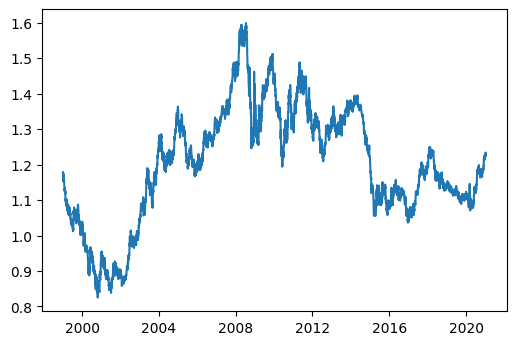

In [38]:
plt.plot(euro_to_dollar["Day"], euro_to_dollar["US_dollar"])
plt.show()

In [39]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(30).mean()

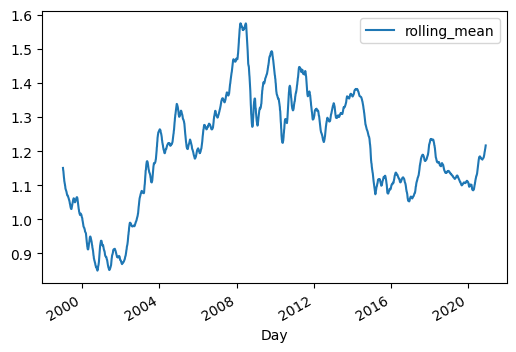

In [40]:
euro_to_dollar.plot.line(x="Day",y="rolling_mean")